# Détecteur des émotions par les expressions faciales

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd "gdrive/MyDrive/emotions/data"

/content/gdrive/MyDrive/emotions/data


In [ ]:
#unzip file in the emotions folder
#!unzip '/content/gdrive/MyDrive/emotions/data_emotion.zip' -d "/content/gdrive/MyDrive/emotions/"

In [3]:
#imports:
import cv2
import glob
import os, os.path
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import itertools
from tensorflow.keras.optimizers import *
from keras.models import Sequential

In [4]:
# get the train and test sets from images
#pour chaque dossier append X avec imread et append y avec son  uméro de classe (0)
def get_dataset(folder):
    dataset = [cv2.imread(file, 0) for file in glob.glob(f"/content/gdrive/MyDrive/emotions/data/{folder}/*.jpg")]
    return dataset

In [5]:
dic_emo = {
    "train/angry" : 0,
    "train/disgust": 1,
    "train/fear":2,
    "train/happy":3,
    "train/neutral":4,
    "train/sad":5,
    "train/surprise":6,
    "test/angry" : 0,
    "test/disgust": 1,
    "test/fear":2,
    "test/happy":3,
    "test/neutral":4,
    "test/sad":5,
    "test/surprise":6,   
}

In [ ]:
#list_data = []
#for key in dic_emo:
 #   tmp = get_dataset(key)
  #  list_data.append(tmp)

In [ ]:
#sauvegarder le dataset pour gagner du temps sur les éxécutions futures
import pickle
#pickle.dump(list_data, open( "full_data.p", "wb" ))

In [ ]:
from google.colab import files
#files.download("full_data.p")

In [ ]:
#recupérer full dataset
import pickle
list_data = pickle.load( open( "/content/gdrive/MyDrive/emotions/full_data.p", "rb" ) )

In [ ]:
# simple version for working with CWD
!cd data
len([name for name in os.listdir('.')])

/bin/bash: line 0: cd: data: No such file or directory


4

In [ ]:
def create_target(dic_emo, tt):
    y = []
    for key in dic_emo:
        path =os.path.join(tt, key)
        target = dic_emo[key]
        for i in range(len([name for name in os.listdir(path)])):
            y.append(target)
    return y

In [20]:
!ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot open directory '.': Transport endpoint is not connected


In [4]:
dic_emo = {
    "angry" : 0,
    "disgust": 1,
    "fear":2,
    "happy":3,
    "neutral":4,
    "sad":5,
    "surprise":6   
}

In [ ]:

y_train = create_target(dic_emo, "train/")
len(y_train)
y_test = create_target(dic_emo, "test/")
len(y_test)

/content/gdrive/MyDrive/emotions/data


7178

In [5]:
X_train = list_data[0:7]
X_test = list_data[7:14]
X_train = np.concatenate(X_train, axis=0 )
X_test = np.concatenate(X_test, axis=0 )
X_test.shape

NameError: ignored

In [ ]:
import pickle
# pickle.dump(X_train, open( "X_train.p", "wb" ))
# pickle.dump(X_test, open( "X_test.p", "wb" ))
# pickle.dump(y_train, open( "y_train.p", "wb" ))
# pickle.dump(y_test, open( "y_test.p", "wb" ))

In [ ]:
!ls

emotions_model	test  train  X_test.p  X_train.p  y_test.p  y_train.p


In [7]:
#recupérer full dataset

import pickle
X_train = pickle.load( open( "X_train.p", "rb" ) )
y_train = pickle.load( open( "y_train.p", "rb" ) )
X_test = pickle.load( open( "X_test.p", "rb" ) )
y_test = pickle.load( open( "y_test.p", "rb" ) )

Text(0.5, 1.0, 'Classe 0')

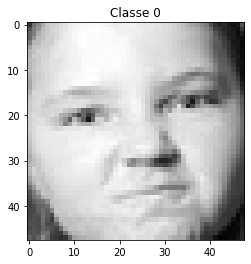

In [8]:
#X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE)
plt.imshow(X_train[600], cmap='gray', interpolation='none')
plt.title("Classe {}".format(y_train[600]))

Entrainement du modèle

In [ ]:
# model = keras.models.Sequential([    
#     keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)),
#     keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPool2D(pool_size=(2, 2)),
#     keras.layers.BatchNormalization(axis=-1),
    
#     keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#     keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
#     keras.layers.MaxPool2D(pool_size=(2, 2)),
#     keras.layers.BatchNormalization(axis=-1),
    
#     keras.layers.Flatten(),
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Dropout(rate=0.5),
    
#     keras.layers.Dense(7, activation='softmax')
# ])
# model.summary()

In [9]:
#normalize
IMG_SIZE = 48
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train=X_train.astype('float')/255
X_test=X_test.astype('float')/255

In [10]:
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

X_train  (28709, 48, 48, 1)
X_test  (7178, 48, 48, 1)
y_train  (28709,)
y_test  (7178,)


In [11]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
#accuracy diminue...
# lr = 0.001
# epochs = 100

#opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.summary()

In [ ]:
# epochs = 100
# model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
# history = model.fit(X_train, y_train, batch_size=32, shuffle=True, epochs=epochs, validation_data=(X_test, y_test))
# #model.save_weights('model.h5')

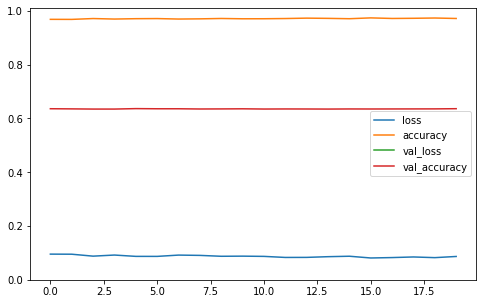

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1.01)
plt.show()

In [ ]:
#model.save('emotions_model')

In [12]:
model2 = models.load_model('emotions_model')

In [14]:
epochs = 10

optimizer = Ftrl(
    learning_rate=0.001,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.0,
    beta=0.0)


model2.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history = model2.fit(X_train, y_train, batch_size=16, shuffle=True, epochs=epochs, validation_data=(X_test, y_test))
#model.save_weights('model.h5')

Epoch 1/10
1795/1795 [==============================] - 29s 16ms/step - loss: 1.9362 - accuracy: 0.2500 - val_loss: 1.9290 - val_accuracy: 0.2471
Epoch 2/10
1795/1795 [==============================] - 27s 15ms/step - loss: 1.9269 - accuracy: 0.2482 - val_loss: 1.9223 - val_accuracy: 0.2471
Epoch 3/10
1795/1795 [==============================] - 27s 15ms/step - loss: 1.9207 - accuracy: 0.2542 - val_loss: 1.9173 - val_accuracy: 0.2471
Epoch 4/10
1795/1795 [==============================] - 27s 15ms/step - loss: 1.9153 - accuracy: 0.2499 - val_loss: 1.9128 - val_accuracy: 0.2471
Epoch 5/10
1795/1795 [==============================] - 28s 15ms/step - loss: 1.9115 - accuracy: 0.2485 - val_loss: 1.9073 - val_accuracy: 0.2471
Epoch 6/10
1795/1795 [==============================] - 28s 15ms/step - loss: 1.9049 - accuracy: 0.2525 - val_loss: 1.8995 - val_accuracy: 0.2471
Epoch 7/10
1795/1795 [==============================] - 27s 15ms/step - loss: 1.8964 - accuracy: 0.2480 - val_loss: 1.8892 -

KeyboardInterrupt: ignored

In [ ]:
#X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE)
plt.imshow(X_test[4000].reshape(IMG_SIZE, IMG_SIZE), cmap='gray', interpolation='none')
plt.title("Classe {}".format(y_test[4000]))

In [ ]:
x = X_test[4000].reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_1 = np.argmax(model.predict(x), axis=-1)
test_1

In [ ]:
y_pred = model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
#y_test = np.argmax(y_test, axis=1)
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, fmt=".0f", linewidths=.5, cmap='YlOrRd')

# WEBCAM

In [ ]:
import cv2
import glob
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import models
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
model = models.load_model('emotions_model')

In [ ]:
#choisir la webcam par défaut
video_capture = cv2.VideoCapture(0)

#récupérer le flux vidéo
while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    #recupération du flux en noir et blanc    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #affichage
    cv2.imshow('frame',gray)
    ###########test application du Réseau#####################
    ################"test modele####################
    #Resizing into 128x128 because we trained the model with this image size.
    im = frame.resize((128,128))
    img_array = np.array(im)

    #Our keras model used a 4D tensor, (images x height x width x channel)
    #So changing dimension 128x128x3 into 1x128x128x3 
    img_array = np.expand_dims(img_array, axis=0)

    #Calling the predict method on model to predict 'me' on the image
    prediction =(model.predict(frame))
    
    #if prediction is 0, which means I am missing on the image, then show the frame in gray color.
    if prediction == 0:
        print("pas de masque")

    #fonction exit (pressez q)
    if cv2.waitKey(1) & 0xFF == ord('q'):
            break

#destruction des fenêtres

video_capture.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(1600,960),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()